# Python Notebook Implementing Media Pipe Gesture Recognition 

### Imports

In [187]:
!pip install -q mediapipe==0.10.0

The folder you are executing pip from can no longer be found.


### Image Displaying Function Note Not needed but cool

In [1]:
from matplotlib import pyplot as plt
import mediapipe as mp
from mediapipe.framework.formats import landmark_pb2
import cv2
import math

plt.rcParams.update({
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.spines.left': False,
    'axes.spines.bottom': False,
    'xtick.labelbottom': False,
    'xtick.bottom': False,
    'ytick.labelleft': False,
    'ytick.left': False,
    'xtick.labeltop': False,
    'xtick.top': False,
    'ytick.labelright': False,
    'ytick.right': False
})

mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles


def display_one_image(image, title, subplot, titlesize=16):
    """Displays one image along with the predicted category name and score."""
    plt.subplot(*subplot)
    plt.imshow(image)
    if len(title) > 0:
        plt.title(title, fontsize=int(titlesize), color='black', fontdict={'verticalalignment':'center'}, pad=int(titlesize/1.5))
    return (subplot[0], subplot[1], subplot[2]+1)


def display_batch_of_images_with_gestures_and_hand_landmarks(images, results):
    """Displays a batch of images with the gesture category and its score along with the hand landmarks."""
    # Images and labels.
    images = [image.numpy_view() for image in images]
    gestures = [top_gesture for (top_gesture, _) in results]
    multi_hand_landmarks_list = [multi_hand_landmarks for (_, multi_hand_landmarks) in results]

    # Auto-squaring: this will drop data that does not fit into square or square-ish rectangle.
    rows = int(math.sqrt(len(images)))
    cols = len(images) // rows

    # Size and spacing.
    FIGSIZE = 13.0
    SPACING = 0.1
    subplot=(rows,cols, 1)
    if rows < cols:
        plt.figure(figsize=(FIGSIZE,FIGSIZE/cols*rows))
    else:
        plt.figure(figsize=(FIGSIZE/rows*cols,FIGSIZE))

    # Display gestures and hand landmarks.
    for i, (image, gestures) in enumerate(zip(images[:rows*cols], gestures[:rows*cols])):
        title = f"{gestures.category_name} ({gestures.score:.2f})"
        dynamic_titlesize = FIGSIZE*SPACING/max(rows,cols) * 40 + 3
        annotated_image = image.copy()

        for hand_landmarks in multi_hand_landmarks_list[i]:
          hand_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
          hand_landmarks_proto.landmark.extend([
            landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in hand_landmarks
          ])
        

          mp_drawing.draw_landmarks(
            annotated_image,
            hand_landmarks_proto,
            mp_hands.HAND_CONNECTIONS,
            mp_drawing_styles.get_default_hand_landmarks_style(),
            mp_drawing_styles.get_default_hand_connections_style())

        subplot = display_one_image(annotated_image, title, subplot, titlesize=dynamic_titlesize)

    # Layout.
    plt.tight_layout()
    plt.subplots_adjust(wspace=SPACING, hspace=SPACING)
    plt.show()

In [9]:
image_file_name = 'Test6.jpg'

In [10]:
model_file = 'gesture_recognizer-7.task'

In [11]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

In [12]:
def get_fingers (image_source, model_source):

    base_options = python.BaseOptions(model_asset_path=model_source)
    options = vision.GestureRecognizerOptions(base_options=base_options, num_hands=5)
    recognizer = vision.GestureRecognizer.create_from_options(options)

    image = mp.Image.create_from_file(image_source)
    
    recognition_result = recognizer.recognize(image)

    top_gesture = recognition_result.gestures
    hand_landmarks = recognition_result.hand_landmarks

    fingers = []

    for i, hands in enumerate(hand_landmarks):

        fingers.append({
            'fingers_up': top_gesture[i][0].category_name,
            'confidence': top_gesture[i][0].score,
            'x': hands[0].x * image.width,
            'y': image.height - (hands[0].y * image.height)
        })
    
    return fingers


In [16]:
get_fingers(image_file_name, model_file)

W20240204 05:23:09.732285 3812499136 gesture_recognizer_graph.cc:128] Hand Gesture Recognizer contains CPU only ops. Sets HandGestureRecognizerGraph acceleration to Xnnpack.


[]

In [7]:
base_options = python.BaseOptions(model_asset_path=model_file)
options = vision.GestureRecognizerOptions(base_options=base_options, num_hands=5)
recognizer = vision.GestureRecognizer.create_from_options(options)

images = []
all_gestures = []
all_hand_landmarks = []
results = []
image = mp.Image.create_from_file(image_file_name)
  
recognition_result = recognizer.recognize(image)

images.append(image)
top_gesture = recognition_result.gestures[0][0]
hand_landmarks = recognition_result.hand_landmarks
all_hand_landmarks.append(hand_landmarks)
results.append((top_gesture, hand_landmarks))

W20240204 03:45:30.026094 3812499136 gesture_recognizer_graph.cc:128] Hand Gesture Recognizer contains CPU only ops. Sets HandGestureRecognizerGraph acceleration to Xnnpack.


## This shows the inside workings must likely wont be deployed

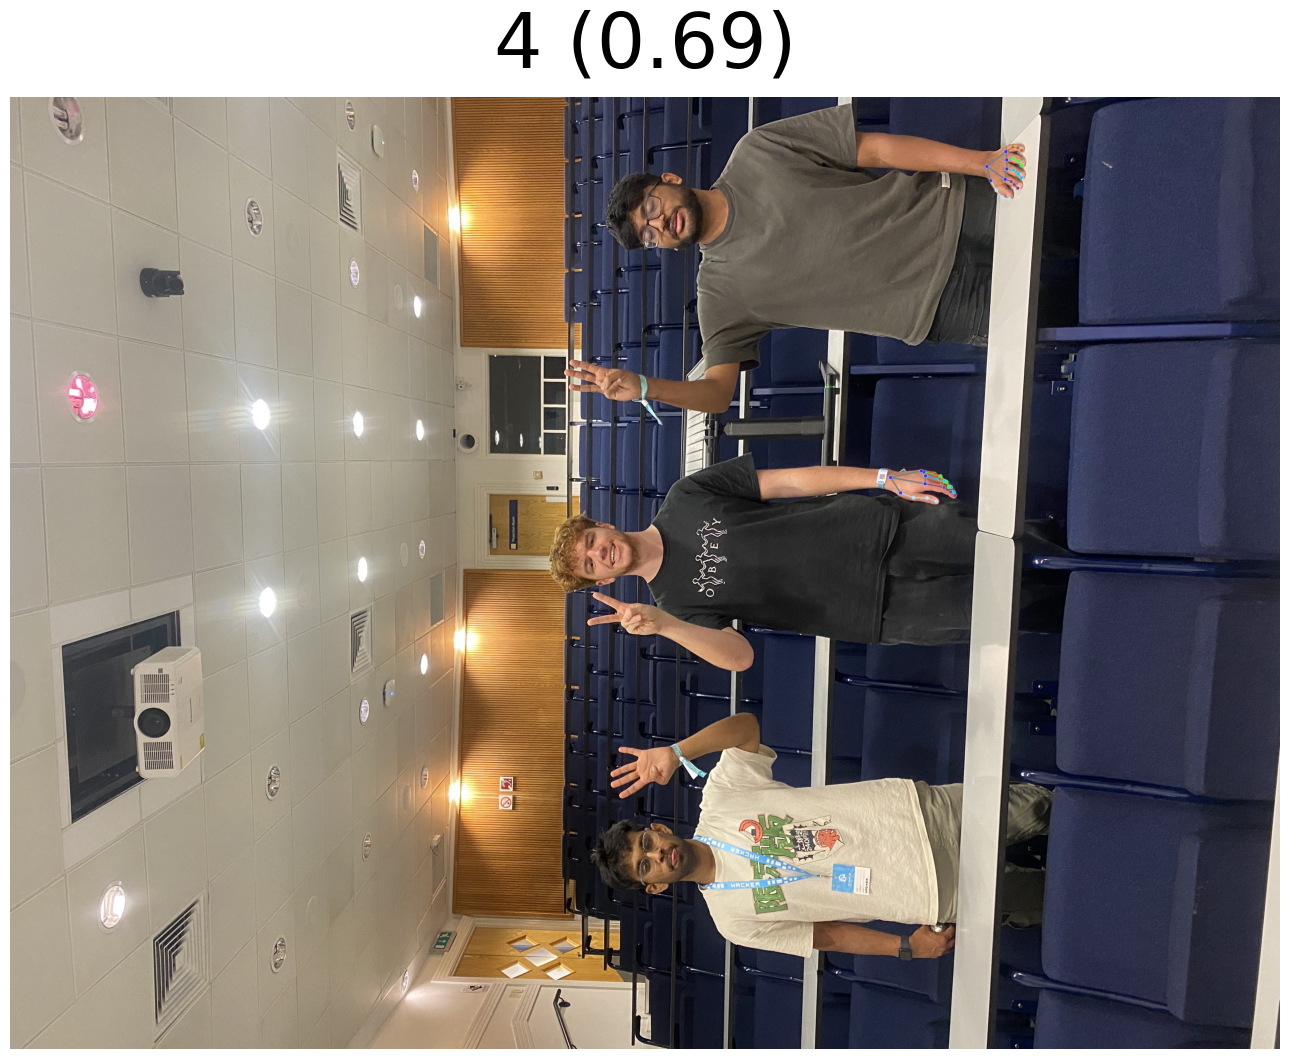

In [15]:
display_batch_of_images_with_gestures_and_hand_landmarks(images, results)

### Gets 

In [ ]:
for i, hands in enumerate(all_hand_landmarks[0]):
    print('Fingers Up:', top_gesture[i][0].category_name)
    print('Position:')
    print('X:', hands[0].x * images[0].width)
    print('Y:', images[0].height - (hands[0].y * images[0].height))
    print('')


Fingers Up: 1
Position:
X: 155.0397491455078
Y: 238.3777141571045

Fingers Up: 4
Position:
X: 549.4397354125977
Y: 47.233943939208984

Fingers Up: 2
Position:
X: 373.64307403564453
Y: 272.5093460083008

Fingers Up: 4
Position:
X: 438.8134002685547
Y: 127.2502326965332



In [ ]:
import face_recognition

In [ ]:
people = ["Ben", "Viyan", "Sid", "Suhas", "Alex"]
known_images = []
for i in people:
    known_images.append(face_recognition.load_image_file(f"../backend/Upload/Known_Photos/{i}.jpeg"))

In [ ]:
unknown_image = face_recognition.load_image_file("../backend/Upload/Test2.jpeg")

In [ ]:
known_encodings = []
for i in known_images:
    known_encodings.append(face_recognition.face_encodings(known_image)[0])
unknown_encoding = face_recognition.face_encodings(unknown_image)[0]

In [ ]:
known_image

array([[[108, 101,  83],
        [108, 101,  83],
        [108, 101,  83],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[108, 101,  83],
        [108, 101,  83],
        [108, 101,  83],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[108, 101,  83],
        [108, 101,  83],
        [108, 101,  83],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[ 64,  58,  44],
        [ 44,  42,  29],
        [ 20,  21,  13],
        ...,
        [229, 197, 146],
        [229, 197, 146],
        [228, 196, 145]],

       [[ 62,  56,  42],
        [ 44,  42,  29],
        [ 16,  17,   9],
        ...,
        [225, 193, 142],
        [225, 193, 142],
        [224, 192, 141]],

       [[ 61,  55,  41],
        [ 43,  41,  28],
        [ 14,  15,   7],
        ...,
        [221, 189, 138],
        [221, 189, 138],
        [219, 187, 136]]

In [ ]:
for i in known_encodings:
    results = face_recognition.compare_faces([i], unknown_encoding)
    print(results)

[True]
[True]
[True]
[True]
[True]


In [ ]:
results

[False]

In [ ]:
import face_recognition
import numpy as np

picture_of_me = face_recognition.load_image_file("../backend/Upload/Known_Photos/Viyan.jpeg")

my_face_encoding = face_recognition.face_encodings(picture_of_me)[0]


unknown_picture = face_recognition.load_image_file("../backend/Upload/IMG_1750.JPG")
face_locations = face_recognition.face_locations(unknown_picture)

for face in face_locations:
    top, right, bottom, left = face
    face_image = unknown_picture[top:bottom, left:right]
    
    unknown_face_encoding = face_recognition.face_encodings(np.array(face_image))[0]

    results = face_recognition.compare_faces([my_face_encoding], unknown_face_encoding, tolerance=0.5)

    if results[0] == True:
        print("It's a picture of me!")
    else:
        print("It's not a picture of me!")